In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\prashant\Downloads\Wholesale customers data.csv")

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
from sklearn.preprocessing import normalize

In [5]:
df1=normalize(df)

In [6]:
df=pd.DataFrame(df1,columns=df.columns)

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [8]:
import scipy.cluster.hierarchy as shc


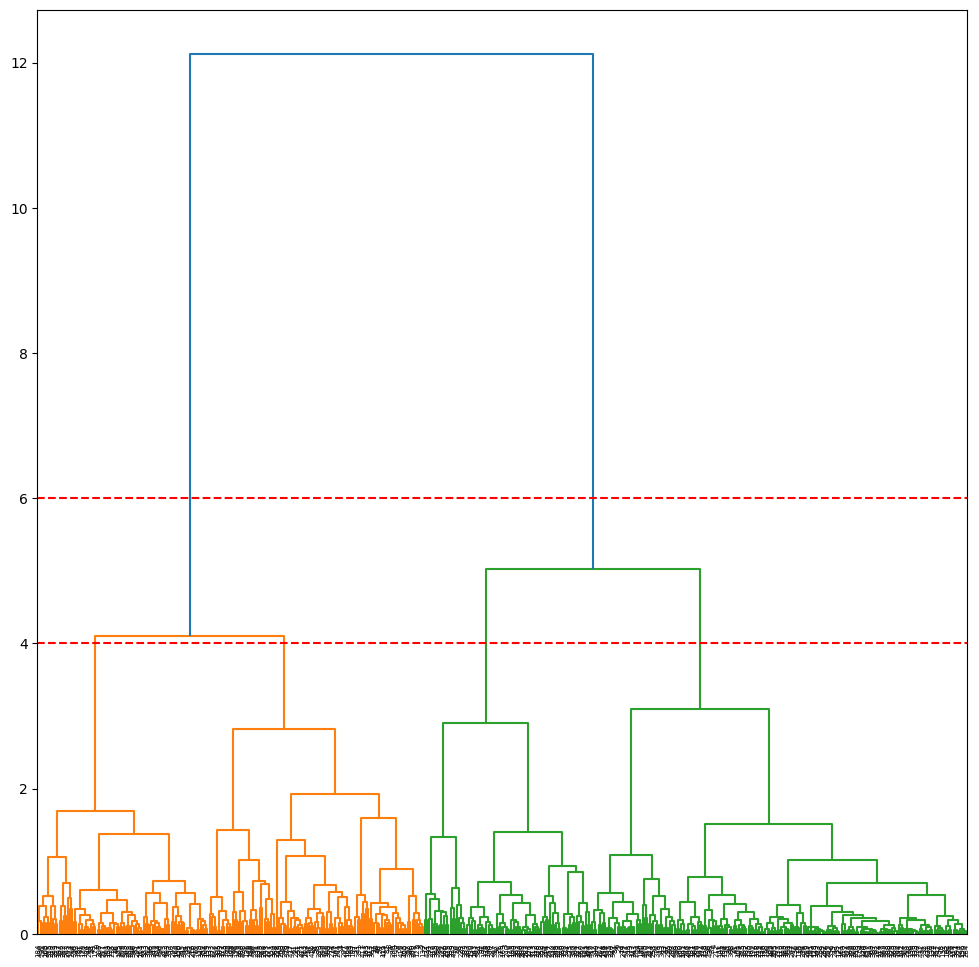

In [9]:
plt.figure(figsize=(12,12))
den=shc.dendrogram(shc.linkage(df,method="ward"))
plt.axhline(6,linestyle="--",color='red')
plt.axhline(4,linestyle="--",color='red')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
ac=AgglomerativeClustering(n_clusters=2)

In [24]:
ypred=ac.fit_predict(df1)

In [25]:
df['Cluster']=ypred

In [26]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,1
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,1
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0


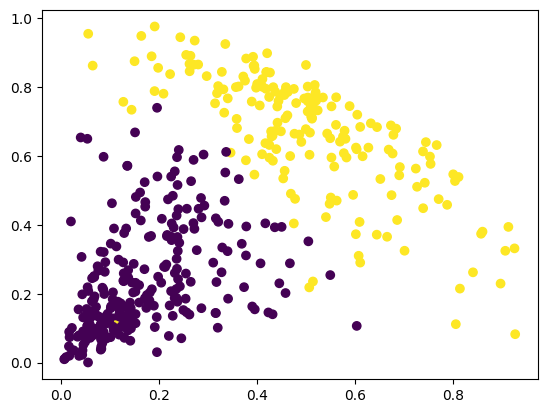

In [27]:
plt.scatter(df['Milk'],df['Grocery'],c=ac.labels_)